In [1]:
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = "retina"

In [2]:
from kpm_linreg import *
from bong.src import bbb, blr, bog, bong, experiment_utils
from bong.util import run_rebayes_algorithm, tune_init_hyperparam

print(AGENT_TYPES)


['fg-bong', 'fg-l-bong', 'fg-rep-bong', 'fg-rep-l-bong', 'fg-blr', 'fg-bog', 'fg-rep-bog', 'fg-bbb', 'fg-rep-bbb']


In [5]:

#python  bong/experiments/kpm_linreg.py  --debug True

#python  experiments/kpm_linreg.py  --agents fg-bong --filename "foo_bar"
#python  experiments/kpm_linreg.py  --agents fg-bong fg-l-bong fg-blr fg-bog fg-bbb
#python  experiments/kpm_linreg.py  --agents fg-rep-bong fg-rep-l-bong fg-rep-bog fg-rep-bbb

parser = argparse.ArgumentParser()
    
  # Data parameters
parser.add_argument("--num_examples", type=int, default=500)
parser.add_argument("--param_dim", type=int, default=10)
parser.add_argument("--key", type=int, default=0)
parser.add_argument("--emission_noise", type=float, default=1.0)

# Model parameters
parser.add_argument("--agents", type=str, nargs="+",
                    default=["fg-bong",  "fg-blr", "fg-bog", "fg-bbb"], choices=AGENT_TYPES)
parser.add_argument("--num_samples", type=int, nargs="+", 
                    default=[100])
parser.add_argument("--learning_rate", type=int, nargs="+", 
                    default=[0.001, 0.005, 0.01, 0.05])
parser.add_argument("--tune_learning_rate", type=bool, default=False)

#https://stackoverflow.com/questions/30656777/how-to-call-module-written-with-argparse-in-ipython-notebook
#args = parser.parse_args()
args = parser.parse_args(args=[])
print(args)

#main(args)#


Namespace(num_examples=500, param_dim=10, key=0, emission_noise=1.0, agents=['fg-bong', 'fg-blr', 'fg-bog', 'fg-bbb'], num_samples=[100], learning_rate=[0.001, 0.005, 0.01, 0.05], tune_learning_rate=False)


Running fg-bong-MC100...
	KL-Div: 0.0172, Time: 0.46s
Running fg-blr-MC100-LR0_001...
	KL-Div: 7.1816, Time: 1.44s
Running fg-blr-MC100-LR0_005...
	KL-Div: 1.6189, Time: 1.44s
Running fg-blr-MC100-LR0_01...
	KL-Div: 0.4641, Time: 1.43s
Running fg-blr-MC100-LR0_05...
	KL-Div: 0.0028, Time: 1.42s
Running fg-bog-MC100-LR0_001...
	KL-Div: 18.8436, Time: 0.46s
Running fg-bog-MC100-LR0_005...
	KL-Div: 16.4101, Time: 0.49s
Running fg-bog-MC100-LR0_01...
	KL-Div: 15.1817, Time: 0.45s
Running fg-bog-MC100-LR0_05...
	KL-Div: nan, Time: 0.45s
Running fg-bbb-MC100-LR0_001...
	KL-Div: 11.5294, Time: 1.65s
Running fg-bbb-MC100-LR0_005...
	KL-Div: 9.3713, Time: 1.56s
Running fg-bbb-MC100-LR0_01...
	KL-Div: 8.6634, Time: 1.62s
Running fg-bbb-MC100-LR0_05...
	KL-Div: nan, Time: 0.76s


ValueError: Unrecognized marker style '*;'

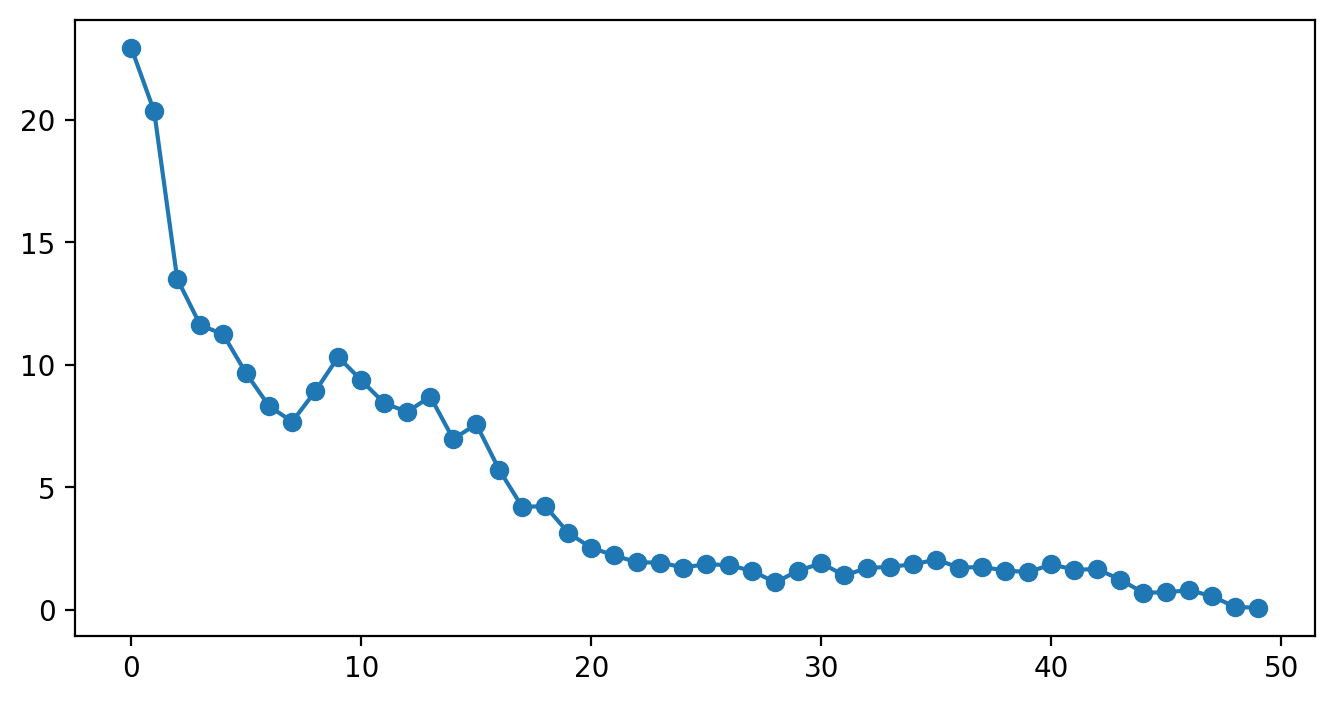

In [6]:
data, subkey = make_data(args)
init_kwargs, callback = init(args, data)
prior, post = compute_prior_post(args, data)
 

agent_queue, subkey = make_agent_queue(subkey, args, init_kwargs, None, data['X_tr'], data['Y_tr'])
result_dict = run_agents(subkey, agent_queue, data, callback)
  
ttl = f"linreg-d{args.param_dim}"
curr_path = None
plot_results(result_dict, curr_path, ttl)


In [41]:

name  = 'fg-bong-MC100'
r = result_dict[name]
T = len(r[1])
print(T)
steps = list(range(0,T))
print(steps)

500
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 

In [42]:
def convert_result_dict_to_pandas(result_dict):
    frames = []
    for name, r in result_dict.items():
        T = len(r[1])
        steps = range(0, T)
        df  = pd.DataFrame({'name': name,  'step': steps, 'kl': np.array(r[1]), 
                            'nll': np.array(r[2]), 'nlpd': np.array(r[3]),
                            'time': r[0],})
        frames.append(df)
    tbl = pd.concat(frames)
    return tbl

tbl = convert_result_dict_to_pandas(result_dict)
print(tbl)

                    name  step         kl       nll      nlpd      time
0          fg-bong-MC100     0  22.950815  2.368018  3.671783  0.462484
1          fg-bong-MC100     1  22.653093  2.680291  3.834912  0.462484
2          fg-bong-MC100     2  22.111879  2.720388  3.849871  0.462484
3          fg-bong-MC100     3  21.769110  2.730461  3.807554  0.462484
4          fg-bong-MC100     4  21.280619  2.525638  3.530576  0.462484
..                   ...   ...        ...       ...       ...       ...
495  fg-bbb-MC100-LR0_05   495        NaN       NaN       NaN  0.758399
496  fg-bbb-MC100-LR0_05   496        NaN       NaN       NaN  0.758399
497  fg-bbb-MC100-LR0_05   497        NaN       NaN       NaN  0.758399
498  fg-bbb-MC100-LR0_05   498        NaN       NaN       NaN  0.758399
499  fg-bbb-MC100-LR0_05   499        NaN       NaN       NaN  0.758399

[6500 rows x 6 columns]


In [35]:
tbl.to_csv('/Users/kpmurphy/github/bong/bong/results/foo.csv', index=False)

In [12]:
result_dict


{'fg-bong-MC100': (0.46248354198178276,
  Array([2.29508152e+01, 2.26530933e+01, 2.21118793e+01, 2.17691097e+01,
         2.12806187e+01, 2.19830608e+01, 2.20961857e+01, 2.15139885e+01,
         2.12678986e+01, 2.01284199e+01, 2.03432426e+01, 2.15423794e+01,
         1.87359543e+01, 1.59252520e+01, 1.48580227e+01, 1.49974546e+01,
         1.47855921e+01, 1.46098967e+01, 1.42634115e+01, 1.35616045e+01,
         1.35118504e+01, 1.33153067e+01, 1.32833652e+01, 1.30214291e+01,
         1.24199820e+01, 1.26722755e+01, 1.28465328e+01, 1.25175886e+01,
         1.16667442e+01, 1.14129324e+01, 1.16298437e+01, 1.14548140e+01,
         1.13177052e+01, 1.13114128e+01, 1.11856441e+01, 1.21381168e+01,
         1.13956718e+01, 1.12784576e+01, 1.12371140e+01, 1.12015371e+01,
         1.12403450e+01, 1.12298899e+01, 1.12290316e+01, 1.11854773e+01,
         1.08538933e+01, 1.02355700e+01, 9.66083813e+00, 9.75895977e+00,
         9.66352940e+00, 9.72795677e+00, 9.64918804e+00, 9.61919689e+00,
         9.